### Raushan Kumar
### LinkedIn: https://www.linkedin.com/in/raushan-kumar-29427616b/

# Loading the data

In [327]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [328]:
# Load the SampleSuperstore dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [329]:
df.shape

(9994, 13)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [331]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Cleaning the data

In [332]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [333]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [334]:
df.drop_duplicates(keep= 'first',inplace=True)
df.shape

(9977, 13)

In [335]:
df.drop(['Country','Postal Code'], axis=1, inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [336]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [337]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [338]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [339]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

# Visualizing the data

### Relation among variables

In [340]:
# Correlation among variables
corr = df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


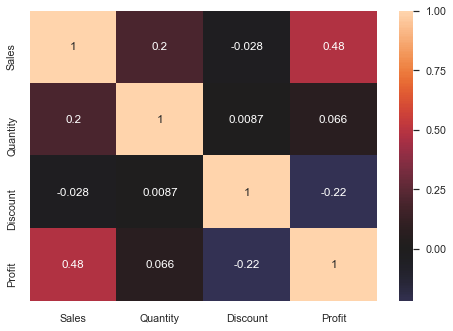

In [341]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0, annot=True)

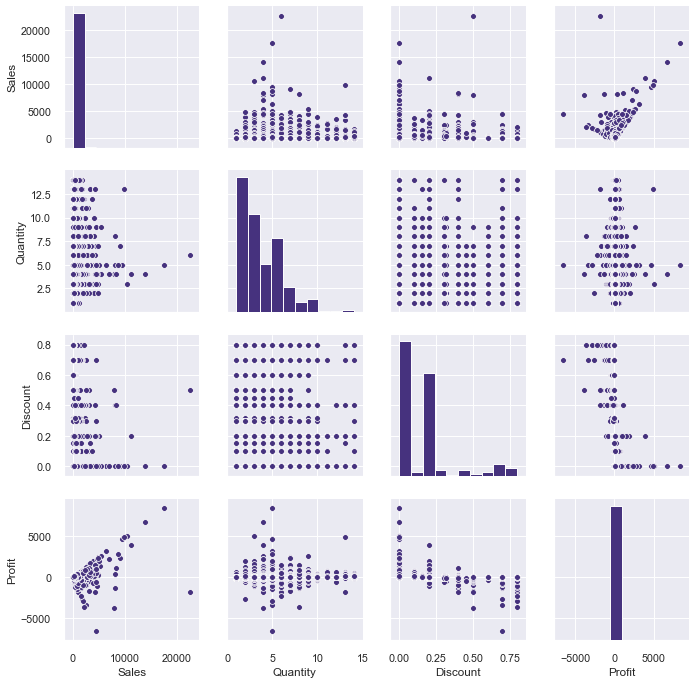

In [342]:
# Pairplot
temp = df.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(temp)

### Checking the data distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002422A5DAF28>,
      dtype=object)

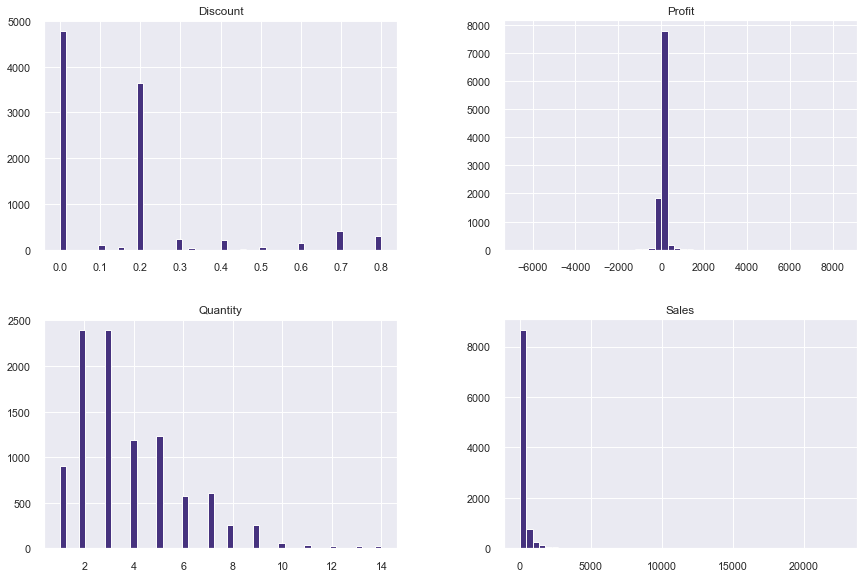

In [343]:
df.hist(bins=50 ,figsize=(15,10))

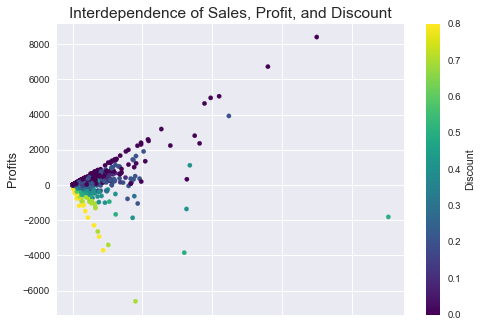

In [344]:
# Interdependence of Sales, Profit, and Discount
plt.style.use('seaborn')
df.plot(kind = "scatter", x = "Sales", y ="Profit", c ="Discount", s =20, marker ="o", colormap ="viridis")
plt.ylabel("Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

### Plotting counts for various features

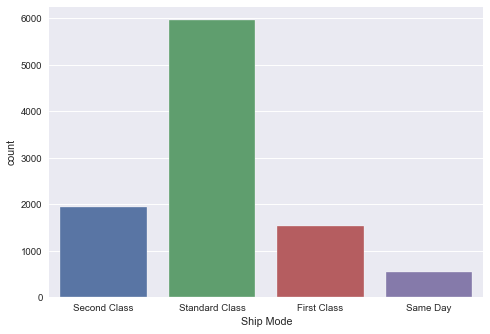

In [345]:
mpl.rcParams['figure.dpi'] = 70
sns.countplot(x=df["Ship Mode"])

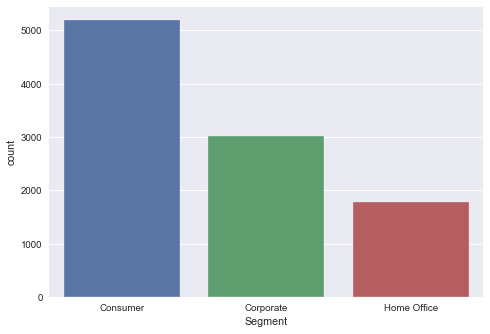

In [346]:
sns.countplot(x=df["Segment"])

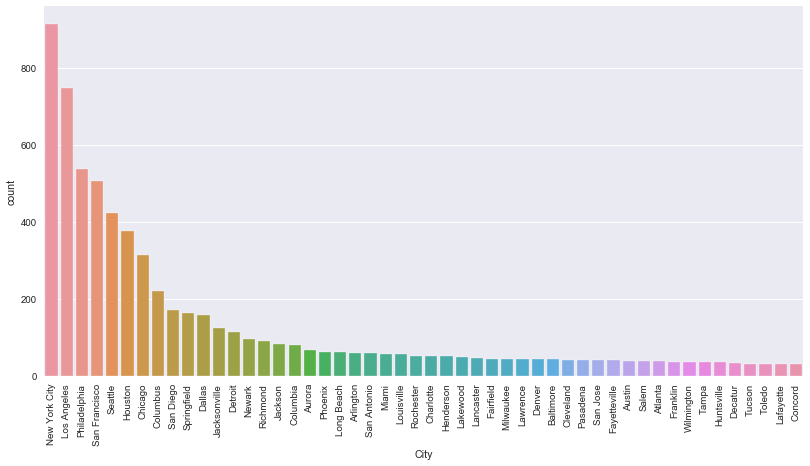

In [347]:
plt.figure(figsize=(14,7))
sns.countplot(x=df["City"],order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation = 90)
plt.show()

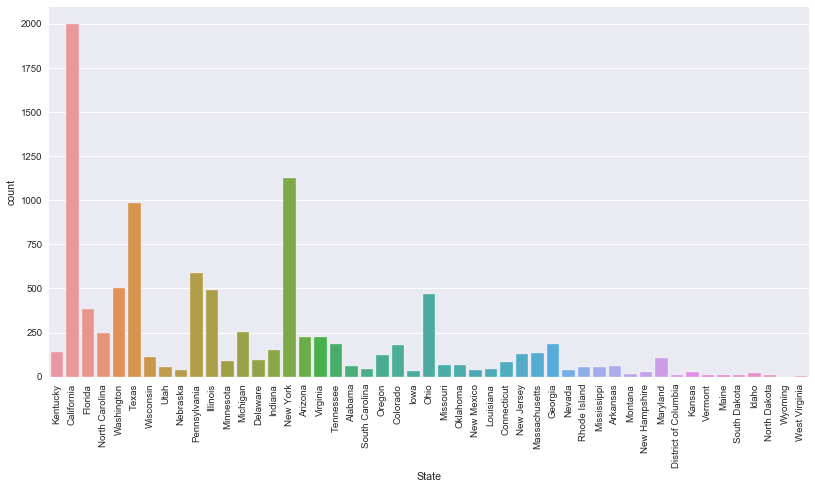

In [348]:
plt.figure(figsize=(14,7))
sns.countplot(x=df["State"])
plt.xticks(rotation = 90)
plt.show()

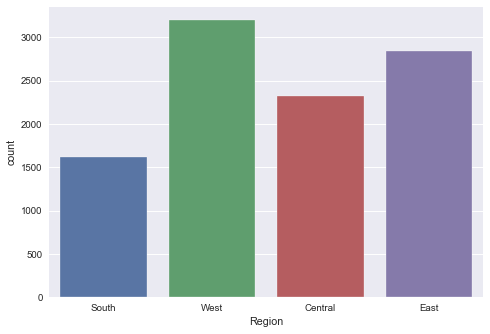

In [349]:
sns.countplot(x=df["Region"])

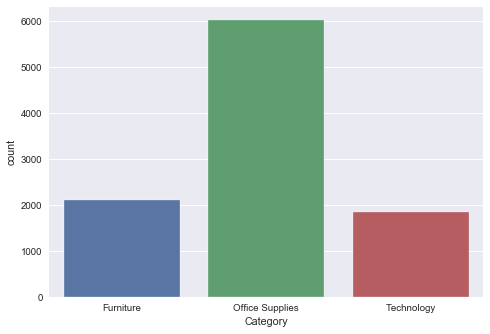

In [350]:
sns.countplot(x=df["Category"])

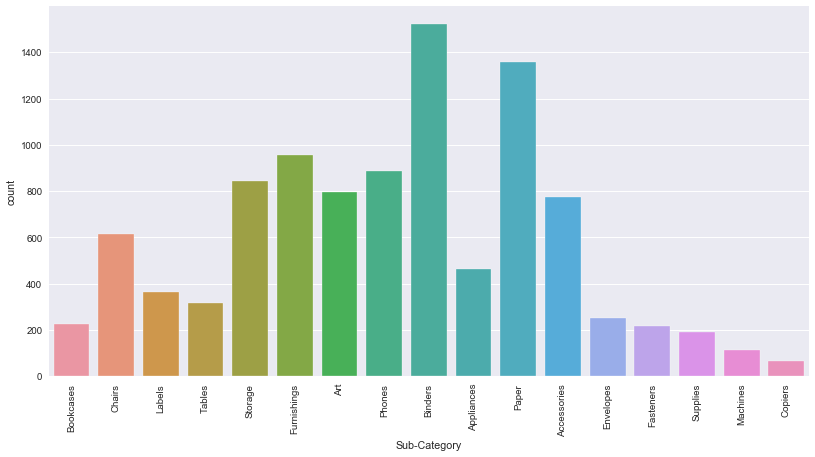

In [351]:
plt.figure(figsize=(14,7))
sns.countplot(x=df["Sub-Category"])
plt.xticks(rotation = 90)
plt.show()

### Comparing region wise Sales, Discount and Profit

In [352]:
d1 = df.groupby(['Region']).Sales.sum()
d2 = df.groupby(['Region']).Discount.sum()
d3 = df.groupby(['Region']).Profit.sum()
pd.concat([d1,d2,d3],axis=1).rename(columns={'Sales':'Total Sales','Discount':'Overall Discount','Profit':'Overall Profit'})

,Total Sales,Overall Discount,Overall Profit
Region,,,
Central,500782.8528,557.14,39655.8752
East,678435.1960,413.50,91506.3092
South,391721.9050,238.55,46749.4303
West,725255.6365,350.00,108329.8079


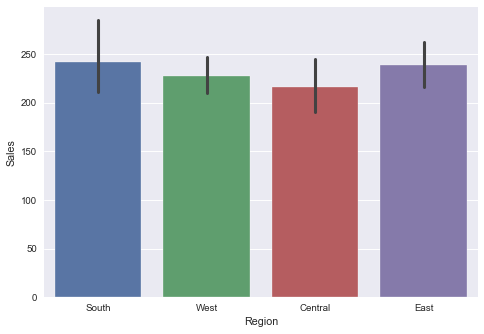

In [353]:
sns.barplot(x=df['Region'],y=df['Sales'])

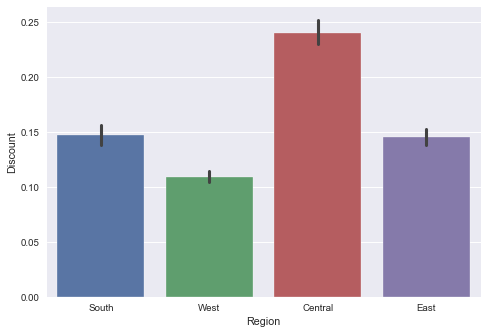

In [354]:
sns.barplot(x=df['Region'],y=df['Discount'])

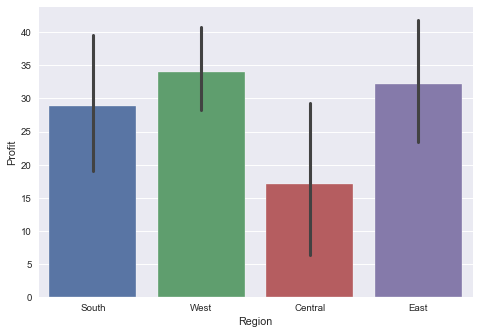

In [355]:
sns.barplot(x=df['Region'],y=df['Profit'])

### Comparing Category wise Quantity and Sales

In [356]:
d1 = df.groupby(['Category']).Sales.sum()
d2 = df.groupby(['Category']).Quantity.sum()
pd.concat([d1,d2],axis=1).rename(columns={'Sales':'Total Sales','Quantity':'Total Quantity'})

,Total Sales,Total Quantity
Category,,
Furniture,741306.3133,8020
Office Supplies,718735.2440,22861
Technology,836154.0330,6939


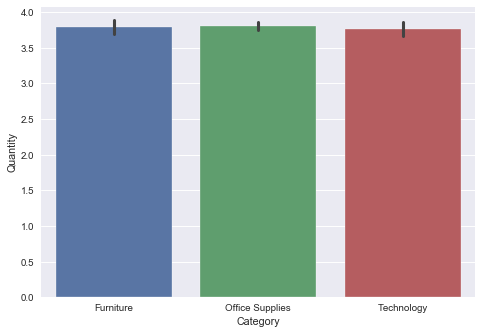

In [357]:
sns.barplot(x=df['Category'],y=df['Quantity'])

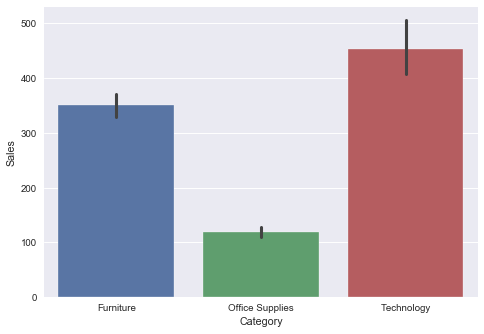

In [358]:
sns.barplot(x=df['Category'],y=df['Sales'])

### Analyzing loses due to discount

Text(0.5, 1.0, 'Profit, When Discount is 0')

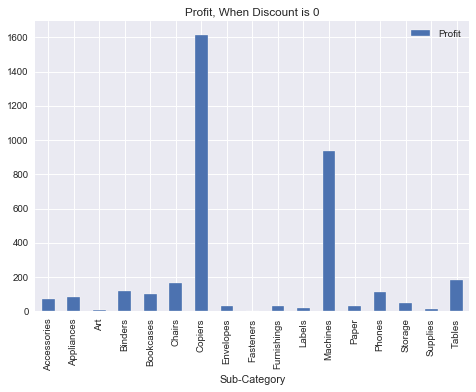

In [359]:
# When Discount is 0
pivot=pd.pivot_table(df[df['Discount']==0],index='Sub-Category',values='Profit')
pivot.plot(kind='bar')
plt.title("Profit, When Discount is 0")

Text(0.5, 1.0, 'Profit, When Discount is not 0')

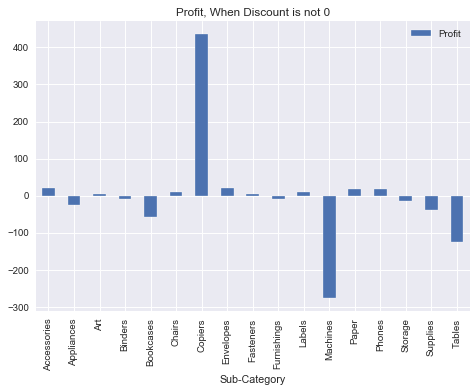

In [360]:
# When Discount is not 0
pivot=pd.pivot_table(df[df['Discount']!=0],index='Sub-Category',values='Profit')
pivot.plot(kind='bar')
plt.title("Profit, When Discount is not 0")

Text(0.5, 1.0, 'Sales, When Discount is 0')

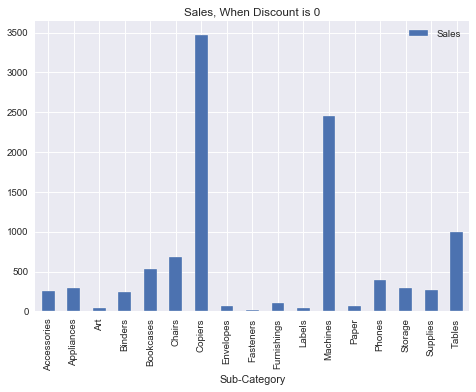

In [361]:
# When Discount is 0
pivot=pd.pivot_table(df[df['Discount']==0],index='Sub-Category',values='Sales')
pivot.plot(kind='bar')
plt.title("Sales, When Discount is 0")

Text(0.5, 1.0, 'Sales, When Discount is not 0')

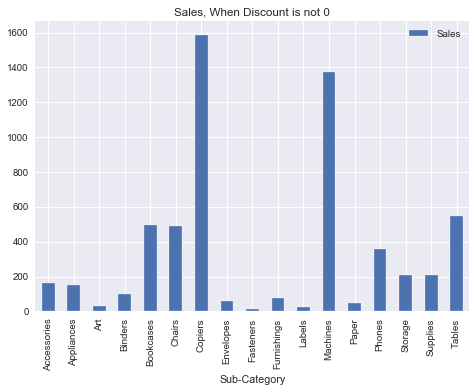

In [362]:
# When Discount is not 0
pivot=pd.pivot_table(df[df['Discount']!=0],index='Sub-Category',values='Sales')
pivot.plot(kind='bar')
plt.title("Sales, When Discount is not 0")

### Top 10 States by Sales and Profits

In [363]:
df.groupby("State").Sales.sum().nlargest(n =10).reset_index()

,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620
5,Florida,89473.7080
6,Illinois,80162.5370
7,Ohio,77976.7640
8,Michigan,75879.6440
9,Virginia,70636.7200


In [364]:
df.groupby("State").Profit.sum().nlargest(n =10).reset_index()

,State,Profit
0,California,76330.7891
1,New York,74015.4622
2,Washington,33368.2375
3,Michigan,24428.0903
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


### Top 10 Cities by Sales and Profits

In [365]:
df.groupby("City").Sales.sum().nlargest(n =10).reset_index()

,City,Sales
0,New York City,256319.0410
1,Los Angeles,175831.9010
2,Seattle,119460.2820
3,San Francisco,112577.1720
4,Philadelphia,109061.4610
5,Houston,64441.2564
6,Chicago,48535.9770
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


In [366]:
df.groupby("City").Profit.sum().nlargest(n =10).reset_index()

,City,Profit
0,New York City,62013.8973
1,Los Angeles,30431.4267
2,Seattle,29121.6825
3,San Francisco,17466.1186
4,Detroit,13146.6935
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


### Top 10 Sub-Categories by Sales and Profits

In [367]:
df.groupby("Sub-Category").Sales.sum().nlargest(n =10).reset_index()

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,327777.7610
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203409.1690
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


In [368]:
df.groupby("Sub-Category").Profit.sum().nlargest(n =10).reset_index()

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,33944.2395
4,Binders,30228.0003
5,Chairs,26567.1278
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13052.7230
9,Envelopes,6964.1767


### Profit Distribution and Discount

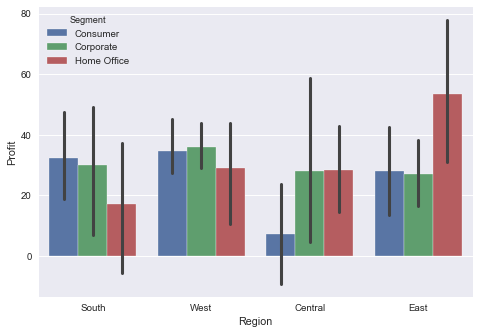

In [369]:
# Profit distribution Segment wise
sns.barplot(data = df , x = "Region",y = "Profit", hue = "Segment")

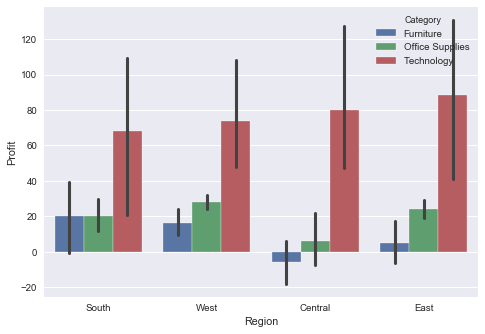

In [370]:
# Profit distribution Category wise
sns.barplot(data = df , x = "Region",y = "Profit", hue = "Category")

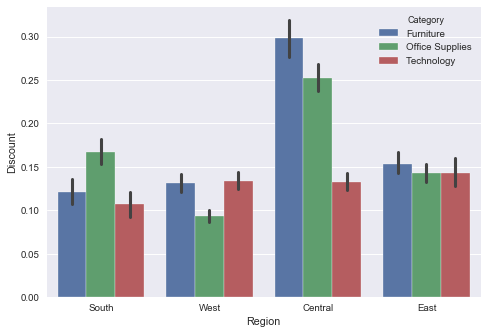

In [371]:
# Discount distribution Category wise
sns.barplot(data = df , x = "Region",y = "Discount", hue = "Category")

In [372]:
# Creating dataframe for furniture in central region
df_furniture = df[df['Category']=='Furniture']
df_central_furniture = df_furniture[df_furniture['Region']=='Central']
df_central_furniture.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
36,First Class,Corporate,Richardson,Texas,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630
38,Standard Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
39,Standard Class,Home Office,Houston,Texas,Central,Furniture,Chairs,212.0580,3,0.30,-15.1470
51,Standard Class,Consumer,New Albany,Indiana,Central,Furniture,Furnishings,6.1600,2,0.00,2.9568
52,Standard Class,Consumer,New Albany,Indiana,Central,Furniture,Chairs,89.9900,1,0.00,17.0981


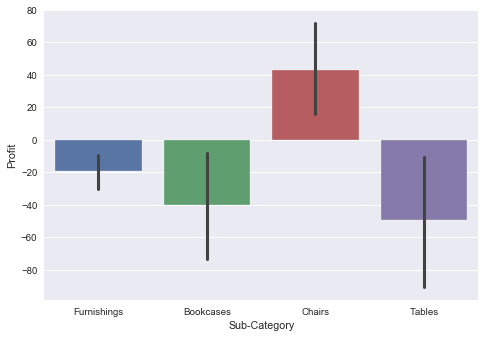

In [373]:
# Profit distribution for Furniture in Central region, Sub-Category wise
sns.barplot(data = df_central_furniture , x = "Sub-Category",y = "Profit")

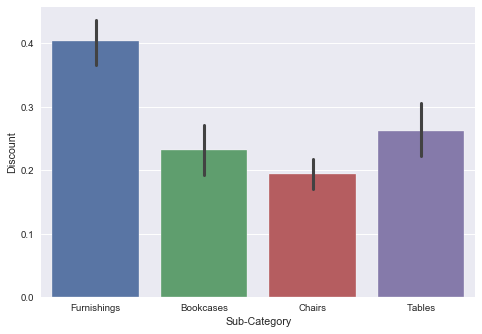

In [374]:
# Discount distribution for Furniture in Central region, Sub-Category wise
sns.barplot(data = df_central_furniture , x = "Sub-Category",y = "Discount")

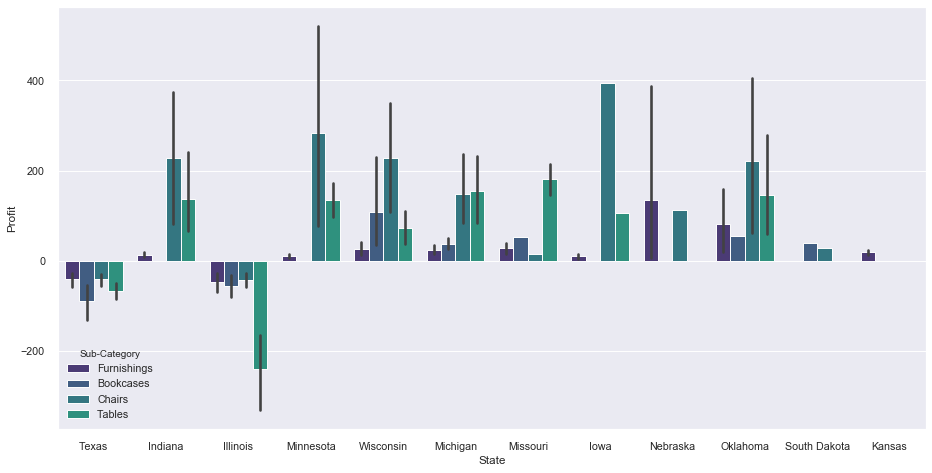

In [375]:
# Profit distribution for Furniture in Central region, State wise
plt.figure(figsize = (16,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = df_central_furniture , x = "State",y = "Profit", hue='Sub-Category')

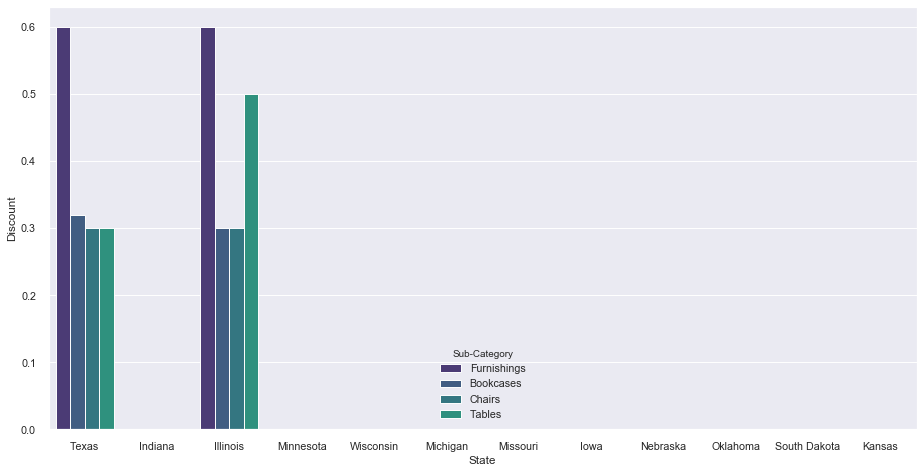

In [376]:
# Discount distribution for Furniture in Central region, State wise
plt.figure(figsize = (16,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = df_central_furniture , x = "State",y = "Discount", hue='Sub-Category')

# Final Conclusions